In [7]:
import pandas as pd
import numpy as np
import matplotlib as cm
import matplotlib.pyplot as plt
import pylab
import collections
import math
import os
import glob

In [2]:
def count_kmers(sequence, k):
    d = collections.defaultdict(int)
    for i in range(len(data)-(k-1)):
        d[sequence[i:i+k]] +=1
    for key in d.copy().keys():
        if "N" in key:
            del d[key]
    return d

In [3]:
def probabilities(kmer_count, k):
    probabilities = collections.defaultdict(float)
    N = len(data)
    for key, value in kmer_count.items():
        probabilities[key] = float(value) / (N - k + 1)
    return probabilities

In [4]:
def chaos_game_representation(probabilities, k):
    array_size = int(math.sqrt(4**k))
    chaos = []
    for i in range(array_size):
        chaos.append([0]*array_size)
#     print(chaos)
    maxx = array_size
    maxy = array_size
    posx = 1
    posy = 1
    for key, value in probabilities.items():
        for char in key:
            if char == "T":
                posx += int(maxx / 2)
            elif char == "C":
                posy += int(maxy / 2)
            elif char == "G":
                posx += int(maxx / 2)
                posy += int(maxy / 2)
            maxx = maxx / 2
            maxy /= 2
#         print(posx,posy)
        chaos[posy-1][posx-1] = value
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
    
    return chaos

# Covid USA Data CGR

In [11]:
with open(r'C:\Users\aniru\Desktop\Amrita\Sem 4\Intelligence of Biological Systems\Project\Data\BetaCoV_USA.txt') as f:
    data = f.readlines()

In [12]:
data = data[0]

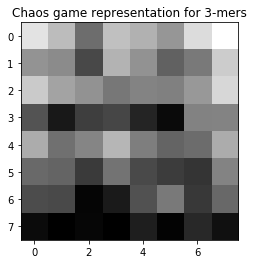

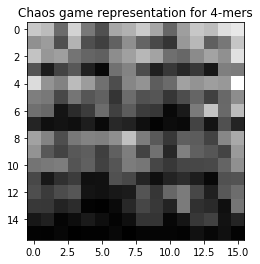

In [18]:
f3 = count_kmers(data, 3)
f4 = count_kmers(data, 4)
 
f3_prob = probabilities(f3, 3)
f4_prob = probabilities(f4, 4)
 
chaos_k3 = chaos_game_representation(f3_prob, 3)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(chaos_k3, interpolation='nearest', cmap=plt.gray())
pylab.show()
 
chaos_k4 = chaos_game_representation(f4_prob, 4)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(chaos_k4, interpolation='nearest', cmap=plt.gray())
pylab.show()

# Covid Wuhan Data CGR

In [24]:
with open(r'C:\Users\aniru\Desktop\Amrita\Sem 4\Intelligence of Biological Systems\Project\Data\BetaCoV_Wuhan.txt') as f:
    data = f.readlines()

In [25]:
data = data[0]

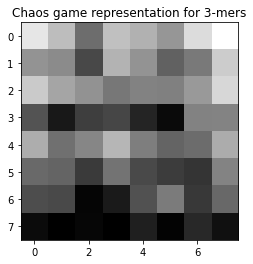

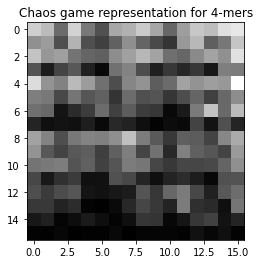

In [10]:
f3 = count_kmers(data, 3)
f4 = count_kmers(data, 4)
 
f3_prob = probabilities(f3, 3)
f4_prob = probabilities(f4, 4)
 
chaos_k3 = chaos_game_representation(f3_prob, 3)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(chaos_k3, interpolation='nearest', cmap=plt.gray())
pylab.show()
 
chaos_k4 = chaos_game_representation(f4_prob, 4)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(chaos_k4, interpolation='nearest', cmap=plt.gray())
pylab.show()

# NC_012920 Data CGR
Homo sapiens mitochondrion, complete genome

In [27]:
with open(r'C:\Users\aniru\Desktop\Amrita\Sem 4\Intelligence of Biological Systems\Project\Data\NC_012920.txt') as f:
    data = f.readlines()

In [28]:
ctr = 0
data1 = []
for i in data:
    data1.extend([i[0:-1]])
    ctr += 1
data = ""
for i in data1:
    data += i
data = data.upper()

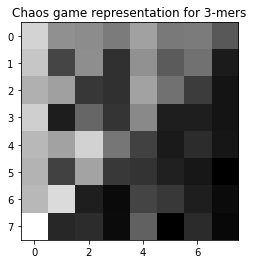

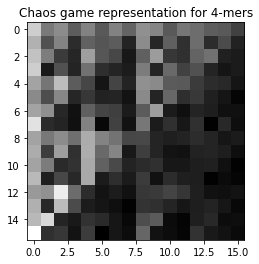

In [7]:
f3 = count_kmers(data, 3)
f4 = count_kmers(data, 4)
 
f3_prob = probabilities(f3, 3)
f4_prob = probabilities(f4, 4)
 
chaos_k3 = chaos_game_representation(f3_prob, 3)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(chaos_k3, interpolation='nearest', cmap=plt.gray())
pylab.show()
 
chaos_k4 = chaos_game_representation(f4_prob, 4)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(chaos_k4, interpolation='nearest', cmap=plt.gray())
pylab.show()

# CGR Scatter plot function

In [148]:
def scatterPlt(d):
    x = [0]
    y = [0]
    for i in d:
        if(i == 'A'):
            x11 = (x[-1]+1)/2
            y11 = (y[-1]+1)/2
            x.append(x11)
            y.append(y11)
        elif(i == 'T'):
            x11 = (x[-1]-1)/2
            y11 = (y[-1]+1)/2
            x.append(x11)
            y.append(y11)
        elif(i == 'C'):
            x11 = (x[-1]-1)/2
            y11 = (y[-1]-1)/2
            x.append(x11)
            y.append(y11)
        elif(i == 'G'):
            x11 = (x[-1]+1)/2
            y11 = (y[-1]-1)/2
            x.append(x11)
            y.append(y11)
    return x,y

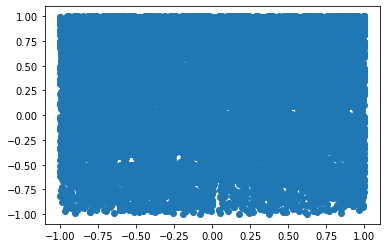

In [149]:
x,y = scatterPlt(data)
plt.scatter(x,y)

# Data Congruence

In [47]:
dd = pd.read_csv(r'C:\Users\aniru\Desktop\Amrita\Sem 4\Intelligence of Biological Systems\Project\CGR_for_Genome_Sequence\Sequence_Data\2019-nCoV.csv', header=None)

# Reading all the Sequence data into a dictionary

In [10]:
path = r'C:\Users\aniru\Desktop\Amrita\Sem 4\Intelligence of Biological Systems\Project\CGR_for_Genome_Sequence\Sequence_Data'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
csvFileNames = [names.split('.')[0] for names in result]

In [24]:
def get_csv(path, fileName):
    print(fileName)
    fileName+=".csv"
    data = pd.read_csv(path+'\\'+fileName, header=None)
    return data

In [126]:
SequenceData = {csvFileName:get_csv(r'C:\Users\aniru\Desktop\Amrita\Sem 4\Intelligence of Biological Systems\Project\CGR_for_Genome_Sequence\Sequence_Data',csvFileName) for csvFileName in csvFileNames}

2019-nCoV
Adenoviridae
Alphacoronavirus
Alphacoronavirus1
Anelloviridae
Betacoronavirus
Betacoronavirus2
Betaflexiviridae
Bromoviridae
Calciviridae
Caudovirales
Coronaviridae
Deltacoronavirus
Deltacoronavirus3
Embecovirus
Embecovirus1
Flaviviridae
Gammacoronavirus
Geminiviridae
Genomoviridae
Merbecovirus
Merbecovirus1
Microviridae
Nobecovirus
Nobecovirus1
Ortervirales
Papillomaviridae
Parvoviridae
Peribunyaviridae
Phenuiviridae
Picornaviridae
Polydnaviridae
Polyomaviridae
Potyviridae
Reoviridae
Rhabdoviridae
Riboviria
Sarbecovirus
Sarbecovirus1
Sarbecovirus2
Secoviridae


In [43]:
print('Possible csv file names:',list(SequenceData.keys()))

Possible csv file names: ['2019-nCoV', 'Adenoviridae', 'Alphacoronavirus', 'Alphacoronavirus1', 'Anelloviridae', 'Betacoronavirus', 'Betacoronavirus2', 'Betaflexiviridae', 'Bromoviridae', 'Calciviridae', 'Caudovirales', 'Coronaviridae', 'Deltacoronavirus', 'Deltacoronavirus3', 'Embecovirus', 'Embecovirus1', 'Flaviviridae', 'Gammacoronavirus', 'Geminiviridae', 'Genomoviridae', 'Merbecovirus', 'Merbecovirus1', 'Microviridae', 'Nobecovirus', 'Nobecovirus1', 'Ortervirales', 'Papillomaviridae', 'Parvoviridae', 'Peribunyaviridae', 'Phenuiviridae', 'Picornaviridae', 'Polydnaviridae', 'Polyomaviridae', 'Potyviridae', 'Reoviridae', 'Rhabdoviridae', 'Riboviria', 'Sarbecovirus', 'Sarbecovirus1', 'Sarbecovirus2', 'Secoviridae']


In [127]:
SeqCleaned = {}
for key in SequenceData.keys():
    SeqCleaned[key] = SequenceData[key].set_index(0)

In [142]:
def select_Data(SeqCleaned, SequecnceData, famName):
    print('Options:',"\n",list(SequenceData[famName][0]))
    inp = input()
    data = SeqCleaned[famName].loc[inp][1]
    return data

In [150]:
data = select_Data(SeqCleaned, SequenceData, 'Secoviridae')

Options: 
 ['NC_001632.1 Rice tungro spherical virus, complete genome', 'NC_003003.1 Broad bean wilt virus 2 RNA 1, complete sequence', 'NC_003004.1 Broad bean wilt virus 2 RNA 2, complete sequence', 'NC_003445.1 Strawberry mottle virus RNA1 gene for polyprotein, genomic RNA', 'NC_003446.1 Strawberry mottle virus RNA2 gene for polyprotein, genomic RNA', 'NC_003495.1 Bean pod mottle virus RNA 2, complete sequence', 'NC_003496.1 Bean pod mottle virus RNA 1, complete sequence', 'NC_003502.1 Blackcurrant reversion virus RNA 2, complete sequence', 'NC_003509.1 Blackcurrant reversion virus RNA1, complete sequence', 'NC_003544.1 Cowpea severe mosaic virus RNA 2, complete sequence', 'NC_003545.1 Cowpea severe mosaic virus RNA 1, complete sequence', 'NC_003549.1 Cowpea mosaic virus RNA 1, complete sequence', 'NC_003550.1 Cowpea mosaic virus (CPMV) middle-component RNA (M RNA)', 'NC_003615.1 Grapevine fanleaf virus RNA 1, complete sequence', 'NC_003621.1 Grapevine chrome mosaic virus RNA 2, comp

NC_043685.1 Artichoke italian latent virus gene for polyprotein, p2 region, segment RNA2, isolate AILV-V, clone Elbeaino T


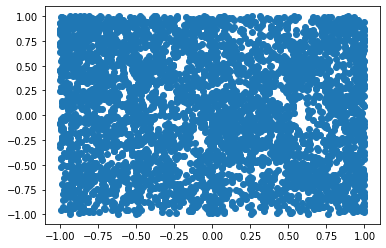

In [151]:
x,y = scatterPlt(data)
plt.scatter(x,y)